In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [100]:
class RMSLogistic:
    """
    Logistic regression with Mean Squared Error cost function

    """
    def __init__(self, learning_rate=0.01, max_iter=10000, fit_intercept=True, verbose=False, saturation=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.verbose = verbose
        self.coef_ = None
        self.fit_intercept = fit_intercept
        self.cost_ = None
        self.coefs_ = None
        self.X = None
        self.y = None
        

    def fit(self, X, y):
        """
        Fit the model according to the given training data.
        employ Mean Square loss function
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target vector relative to X.
        Returns
        -------
        self : object
        """
        self.X = X
        self.y = y
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        self.coef_ = np.zeros(X.shape[1])
        self.coefs_ = []
        self.cost_ = []
        for i in range(self.max_iter):
            self.coefs_.append(self.coef_)
            self.cost_.append(self.cost(X, y, self.coef_))
            self.coef_ = self.coef_ - self.learning_rate * self.grad(X, self.coef_)
            if self.verbose:
                if i%100 == 0:
                    print('Iteration: ' + str(i) + ' Cost: ' + str(self.cost(X, y, self.coef_)))
        self.coefs_ = np.array(self.coefs_)
        return self
    def sigmoid(self, Z):
        """
        Compute the sigmoid function
        for each element of Z
        """
        return 1 / (1 + np.exp(-Z))
        
    def cost(self, X, y,  coef):
        """
        calculate mean square cost

        """
        y_hat = self.sigmoid(np.dot(X, coef))
        return np.mean((y_hat - y) ** 2)

    def grad(self, X,  coef):
        """
        calculate gradient of mean square cost function
        wrt to each coefficient

        """
        y_hat = self.sigmoid(np.dot(X, coef))
        return np.dot(X.T, (y_hat - self.y)) / X.shape[0]
        
    def predict(self, X):
        """
        Predict class labels for samples in X.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Samples.
        Returns
        -------
        C : array, shape = [n_samples]
            Predicted class label per sample.
        """
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        return np.round(self.sigmoid(np.dot(X, self.coef_)))

    def score(self, X, y):
        """
        Return the mean accuracy on the given test data and labels.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Test samples.
        y : array-like, shape = [n_samples]
            True labels for X.
        Returns
        -------
        score : float
            Mean accuracy of self.predict(X) wrt. y.
        """
        return np.mean(self.predict(X) == y)


    def plot_cost(self):
        plt.plot(range(self.max_iter), self.cost_)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()
    
    def plot_coeff_cost_contour(self):
        # print error message if features is not 2-dimensional
        if self.X.shape[1] != 1:
            print('Error: Features must be 2-dimensional including w0 but is ' + str(self.X.shape[1]) + '-dimensional.')
            return
        
        coeff0min = np.min(self.coefs_[:, 0])-1
        coeff0max = np.max(self.coefs_[:, 0])+1
        coeff1min = np.min(self.coefs_[:, 1]) - 1
        coeff1max = np.max(self.coefs_[:, 1])+1

        coeff0 = np.linspace(coeff0min, coeff0max, 100)
        coeff1 = np.linspace(coeff1min, coeff1max, 100)
        coeff0, coeff1 = np.meshgrid(coeff0, coeff1)
        cost = np.zeros(coeff0.shape)
        for i in range(coeff0.shape[0]):
            for j in range(coeff0.shape[1]):
                cost[i, j] = self.totalCost(np.array([coeff0[i, j], coeff1[i, j]]))
        plt.contour(coeff0, coeff1, cost, levels=20)
        # plot the selected tragectory
        plt.scatter(self.coefs_[:, 0], self.coefs_[:, 1])
        plt.xlabel('w0')
        plt.ylabel('w1')
        plt.show()

    def plot_classifier(self):
        # print error message if features is not 2-dimensional
        # if self.X.shape[1] != 2:
        #     print('Error: Features must be 2-dimensional including w0 but is ' + str(self.X.shape[1]) + '-dimensional.')
        #     return
        
        # plot the data points
        plt.scatter(X, y, c='b', marker='o', s=50)
        # plot the decision boundary
        x1 = np.linspace(np.min(X), np.max(X), 100)
        x2 = self.sigmoid(self.coef_[0] + self.coef_[1] * x1)
        plt.plot(x1, x2, c='r', linewidth=2)
        # plot the decision boundary
        x3 = [0.1 if x < 0.5 else 0.9 for x in x2]
        plt.scatter(x1, x3, c='g', marker='x', s=50, alpha=0.5)
        plt.xlabel('y')
        plt.ylabel('x')
        plt.show()
        

In [101]:
# generate dataset using makeblobs
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=80, n_features=1)


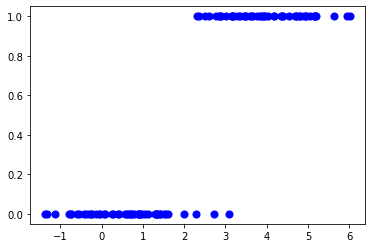

In [102]:
# plot dataset
plt.scatter(X, y, c='b', marker='o', s=50)
plt.show()

In [103]:
lrc = RMSLogistic(learning_rate=0.01, max_iter=100000, fit_intercept=True, verbose=True)
lrc.fit(X, y)



Iteration: 0 Cost: 0.24635480955570643
Iteration: 100 Cost: 0.16304838589271578
Iteration: 200 Cost: 0.14632290155308522
Iteration: 300 Cost: 0.13224205755777627
Iteration: 400 Cost: 0.12021247110400768
Iteration: 500 Cost: 0.1100741868665769
Iteration: 600 Cost: 0.10154607211932878
Iteration: 700 Cost: 0.09434188074173236
Iteration: 800 Cost: 0.08821470432521494
Iteration: 900 Cost: 0.0829636926901542
Iteration: 1000 Cost: 0.07842882408433488
Iteration: 1100 Cost: 0.0744832655775518
Iteration: 1200 Cost: 0.07102630674032556
Iteration: 1300 Cost: 0.0679775712556894
Iteration: 1400 Cost: 0.0652724860484305
Iteration: 1500 Cost: 0.06285879690861082
Iteration: 1600 Cost: 0.06069390335125425
Iteration: 1700 Cost: 0.05874281886369223
Iteration: 1800 Cost: 0.05697660397117996
Iteration: 1900 Cost: 0.055371156034780815
Iteration: 2000 Cost: 0.05390626871991287
Iteration: 2100 Cost: 0.052564896168365814
Iteration: 2200 Cost: 0.051332573395176787
Iteration: 2300 Cost: 0.050196956635117536
Itera

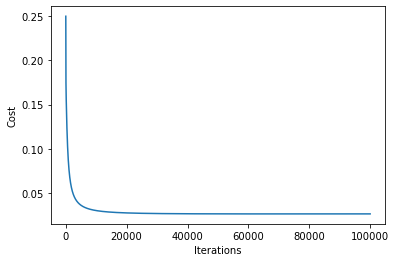

In [104]:
lrc.plot_cost()

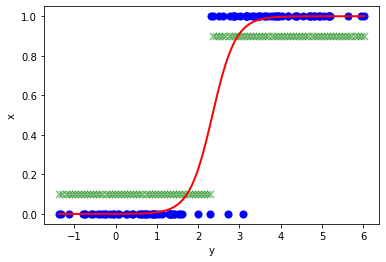

In [105]:
lrc.plot_classifier()